In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Load the data from the prior notebook

Plot time vs x, as a demonstration of interaction with the dataframe.

In [3]:
df_states = pandas.read_hdf('planar_drone_sim_states.hdf')

Text(0, 0.5, 'x pos, m')

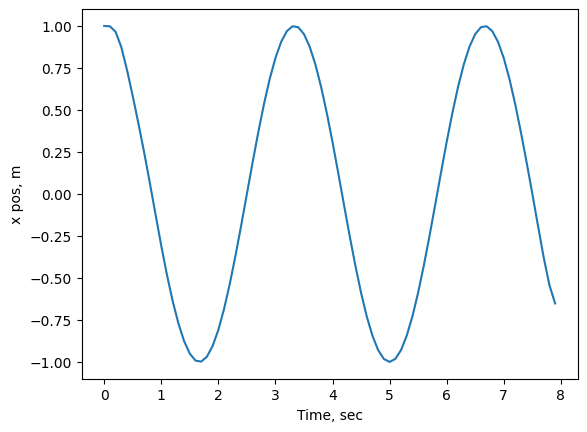

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df_states['t'], df_states['x'])
ax.set_xlabel('Time, sec')
ax.set_ylabel('x pos, m')

# Create an animation to visualize the dynamics.

<span style="color:blue;">AI tip: use an LLM to generate the animation. I tried Claude with the following prompt. I asked for a little followup help to get it working in the jupyter notebook environment, and to download as a gif. 

<span style="color:blue;">Prompt: "I need a python function that uses matplotlib to animate the following scenario. I have a simple model of a planar drone. The drone has 2 motors symmetrically placed a distance of L from the center of gravity. I have a trajectory in x, z of the drones center of gravity. I also have the angle, theta, that describes the drones deviation from being flat. I would like a function that I can provide x, z, and theta to, and it should generate a 2d animation of the drone flying."

### Below code is directly copy/pasted from Claude

I only commented out the main function, and moved it to the cell below. 

In [43]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def animate_drone(x_trajectory, z_trajectory, theta_trajectory, L=1.0, 
                  interval=50, trail_length=50, figsize=(10, 8)):
    """
    Animate a planar drone following a given trajectory.
    
    Parameters:
    -----------
    x_trajectory : array-like
        X positions of the drone's center of gravity
    z_trajectory : array-like  
        Z positions of the drone's center of gravity
    theta_trajectory : array-like
        Angle theta (in radians) describing drone's deviation from being flat
    L : float, default=1.0
        Half-distance between motors (distance from CG to each motor)
    interval : int, default=50
        Animation interval in milliseconds
    trail_length : int, default=50
        Number of previous positions to show as a trail
    figsize : tuple, default=(10, 8)
        Figure size (width, height)
    
    Returns:
    --------
    fig, ani : matplotlib figure and animation objects
    """
    
    # Convert to numpy arrays
    x_traj = np.array(x_trajectory)
    z_traj = np.array(z_trajectory)
    theta_traj = np.array(theta_trajectory)
    
    # Validate input lengths
    if not (len(x_traj) == len(z_traj) == len(theta_traj)):
        raise ValueError("All trajectory arrays must have the same length")
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculate plot limits with some padding
    x_range = x_traj.max() - x_traj.min()
    z_range = z_traj.max() - z_traj.min()
    padding = max(x_range, z_range) * 0.1 + L
    
    ax.set_xlim(x_traj.min() - padding, x_traj.max() + padding)
    ax.set_ylim(z_traj.min() - padding, z_traj.max() + padding)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Z Position')
    ax.set_title('Planar Drone Animation')
    
    # Initialize plot elements
    drone_body, = ax.plot([], [], 'k-', linewidth=3, label='Drone Body')
    left_motor, = ax.plot([], [], 'ro', markersize=8, label='Left Motor')
    right_motor, = ax.plot([], [], 'bo', markersize=8, label='Right Motor')
    center_point, = ax.plot([], [], 'go', markersize=6, label='Center of Gravity')
    trail, = ax.plot([], [], 'g--', alpha=0.5, linewidth=1, label='Trail')
    
    # Add legend
    ax.legend(loc='upper right')
    
    # Store trail data
    trail_x = []
    trail_z = []
    
    def animate_frame(frame):
        # Current position and angle
        x_cg = x_traj[frame]
        z_cg = z_traj[frame]
        theta = theta_traj[frame]
        
        # Calculate motor positions relative to center of gravity
        # Left motor is at -L*cos(theta) in x and -L*sin(theta) in z
        # Right motor is at +L*cos(theta) in x and +L*sin(theta) in z
        left_x = x_cg - L * np.cos(theta)
        left_z = z_cg - L * np.sin(theta)
        right_x = x_cg + L * np.cos(theta)
        right_z = z_cg + L * np.sin(theta)
        
        # Update drone components
        drone_body.set_data([left_x, right_x], [left_z, right_z])
        left_motor.set_data([left_x], [left_z])
        right_motor.set_data([right_x], [right_z])
        center_point.set_data([x_cg], [z_cg])
        
        # Update trail
        trail_x.append(x_cg)
        trail_z.append(z_cg)
        
        # Keep only recent trail points
        if len(trail_x) > trail_length:
            trail_x.pop(0)
            trail_z.pop(0)
        
        trail.set_data(trail_x, trail_z)
        
        return drone_body, left_motor, right_motor, center_point, trail
    
    # Create animation
    ani = animation.FuncAnimation(fig, animate_frame, frames=len(x_traj),
                                interval=interval, blit=True, repeat=True)
    
    plt.tight_layout()
    return fig, ani

# Example usage and test function
def create_example_trajectory(duration=10, dt=0.1):
    """
    Create an example trajectory for testing the animation.
    
    Parameters:
    -----------
    duration : float
        Total duration of trajectory in seconds
    dt : float
        Time step in seconds
    
    Returns:
    --------
    x, z, theta : arrays of trajectory data
    """
    t = np.arange(0, duration, dt)
    
    # Example: circular trajectory with oscillating angle
    radius = 5
    frequency = 0.5  # Hz
    
    x = radius * np.cos(2 * np.pi * frequency * t)
    z = radius * np.sin(2 * np.pi * frequency * t) + radius  # Offset to keep positive
    theta = 0.3 * np.sin(4 * np.pi * frequency * t)  # Oscillating angle
    
    return x, z, theta

# For Jupyter Notebook usage:
def display_animation_jupyter(x_trajectory, z_trajectory, theta_trajectory, L=1.0):
    """
    Convenience function to display animation in Jupyter notebooks
    """
    from IPython.display import HTML
    
    fig, ani = animate_drone(x_trajectory, z_trajectory, theta_trajectory, L=L)
    plt.close(fig)  # Prevent static plot from showing
    return HTML(ani.to_jshtml())

# Example usage:
if 0: # from Claude -- moved to next cell
    if __name__ == "__main__":
        # Generate example trajectory
        x_traj, z_traj, theta_traj = create_example_trajectory()
        
        # For Jupyter notebooks - use this approach:
        # 1. First run: %matplotlib inline (or %matplotlib widget)
        # 2. Then use one of these methods:
        
        # Method 1: HTML animation (recommended for Jupyter)
        from IPython.display import HTML
        fig, ani = animate_drone(x_traj, z_traj, theta_traj, L=0.5)
        plt.close(fig)  # Prevents static plot
        HTML(ani.to_jshtml())  # This line should be the last line in your cell
        
        # Method 2: Use the convenience function
        # display_animation_jupyter(x_traj, z_traj, theta_traj, L=0.5)
        
        # Method 3: Save to file and display
        # fig, ani = animate_drone(x_traj, z_traj, theta_traj, L=0.5)
        # ani.save('drone_animation.gif', writer='pillow', fps=20)
        # from IPython.display import Image
        # Image('drone_animation.gif')

### Run the animation

In [44]:
%matplotlib inline

In [45]:
# Claude's example
if 0: 
    # Generate example trajectory
    x_traj, z_traj, theta_traj = create_example_trajectory()
    
    # For Jupyter notebooks - use this approach:
    # 1. First run: %matplotlib inline (or %matplotlib widget)
    # 2. Then use one of these methods:
    
    # Method 1: HTML animation (recommended for Jupyter)
    from IPython.display import HTML
    fig, ani = animate_drone(x_traj, z_traj, theta_traj, L=0.5)
    plt.close(fig)  # Prevents static plot
    #HTML(ani.to_jshtml())  # This line should be the last line in your cell <<< I moved to next cell

# Our example
else: 
    # Method 1: HTML animation (recommended for Jupyter)
    from IPython.display import HTML
    fig, ani = animate_drone(x_sim['x'], x_sim['z'], x_sim['theta'], L=0.5)
    plt.close(fig)  # Prevents static plot
    #HTML(ani.to_jshtml())  # This line should be the last line in your cell <<< I moved to next cell

In [46]:
HTML(ani.to_jshtml())  # This line should be the last line in your cell

### Save as a gif

<span style="color:blue;">AI tip: I asked claude to help me convert to a gif.

In [48]:
ani.save('drone_animation.gif', writer='pillow', fps=20)

# Exercises

1. Given $j_1, j_2$, determine $u_1, u_2$ (see original notes deriving the system)
2. (Use AI to) update the animation to show the magnitude of the motor commands ($u_1, u_2$) as changing colors of the motors. 

# Lessons learned

1. Loading and pulling data from a pandas dataframe
2. How to make animations of dynamics (using AI)